# Benchmarks

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from matplotlib.ticker import ScalarFormatter

In [31]:
methods = ['tmvec1', 'tmvec2', 'tmvec2_student', 'foldseek']
names = ['TM-Vec', 'TM-Vec 2', 'TM-Vec 2 Student', 'Foldseek']

In [32]:
tmvec1_times = [0.3553493581712246,
3.6675993213430047,
36.81747613847256,
183.44600402377546,
367.4659767560661,
1867.914070468396]

In [33]:
tmvec2_times = [0.021002411531905334,
0.20721696565548578,
2.6197565821930766,
17.30313423803697,
26.886962222556274,
146.34414339872697]

In [34]:
tmvec2_student_times = [0.019774652707080047,
0.02359441326310237,
0.19555904436856508,
0.9846283647542199,
1.9633024039988716,
9.65611858976384]

In [35]:
foldseek_times = [0.16779130138456821,
0.469748445165654,
4.61062142594407,
42.75606065709144,
149.34958104820302,
978.4526033696408]

Encoding

In [36]:
# Create dataframe from timing arrays
sequences = [10, 100, 1000, 5000, 10000, 50000]

df = pd.DataFrame({
    'sequences': sequences,
    'tmvec2': tmvec2_times,
    'foldseek': foldseek_times,
    'tmvec2_student': tmvec2_student_times,
    'tmvec1': tmvec1_times
})

In [37]:
df_melt = df.melt(id_vars='sequences', var_name='method', value_name='runtime')

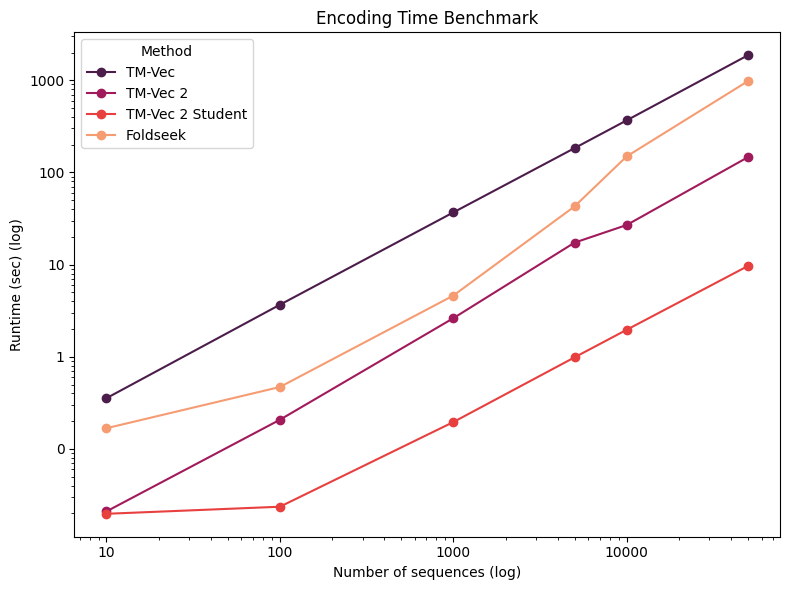

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

n_methods = len(methods)
colors = sns.color_palette("rocket", n_colors=n_methods)

plt.figure(figsize=(8, 6))
for method, name, color in zip(methods, names, colors):
    df_ = df_melt.query(f'method == "{method}"')
    plt.plot('sequences', 'runtime', data=df_, marker='o', label=name, color=color)

plt.legend(title='Method')
plt.xscale('log')
plt.yscale('log')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Number of sequences (log)')
plt.ylabel('Runtime (sec) (log)')
plt.title('Encoding Time Benchmark')
plt.tight_layout()
plt.savefig('encoding.svg')

Query

In [39]:
# Load query timing data from benchmark results
tmvec1_query = pd.read_csv('../../results/time_benchmarks/tmvec1_20260118_214330/query_times.csv')
tmvec1_query['method'] = 'tmvec1'

tmvec2_query = pd.read_csv('../../results/time_benchmarks/tmvec2_20260118_182754/query_times.csv')
tmvec2_query['method'] = 'tmvec2'

tmvec2_student_query = pd.read_csv('../../results/time_benchmarks/tmvec2_student_20260118_184425/query_times.csv')
tmvec2_student_query['method'] = 'tmvec2_student'

foldseek_query = pd.read_csv('../../results/time_benchmarks/foldseek_20260119_122508/query_times.csv')
foldseek_query['method'] = 'foldseek'

# Combine all query data
df = pd.concat([tmvec1_query, tmvec2_query, tmvec2_student_query, foldseek_query], ignore_index=True)

# Rename columns to match expected format
df = df.rename(columns={'database_size': 'db_size'})
df

,query_size,db_size,encode_mean,encode_std,db_load_time_one_time,search_mean,search_std,total_mean,total_std,num_runs,warmup_runs,method,db_build_time_one_time
0,10,1000,0.356340,0.000000,0.215409,0.000680,0.000000e+00,0.357020,0.000000,1,1,tmvec1,NaN
1,100,1000,3.636773,0.000000,0.215409,0.002871,0.000000e+00,3.639644,0.000000,1,1,tmvec1,NaN
2,1000,1000,36.808910,0.000000,0.215409,0.026067,0.000000e+00,36.834977,0.000000,1,1,tmvec1,NaN
3,10,10000,0.356037,0.000000,0.021217,0.006047,0.000000e+00,0.362084,0.000000,1,1,tmvec1,NaN
4,100,10000,3.683491,0.000000,0.021217,0.027777,0.000000e+00,3.711268,0.000000,1,1,tmvec1,NaN
5,1000,10000,36.782038,0.000000,0.021217,0.251675,0.000000e+00,37.033713,0.000000,1,1,tmvec1,NaN
6,10,100000,0.355779,0.000000,0.019889,0.006189,0.000000e+00,0.361968,0.000000,1,1,tmvec1,NaN
7,100,100000,3.660762,0.000000,0.019889,0.031880,0.000000e+00,3.692642,0.000000,1,1,tmvec1,NaN
8,1000,100000,36.697832,0.000000,0.019889,0.344608,0.000000e+00,37.042440,0.000000,1,1,tmvec1,NaN
9,10,1000,0.018684,0.000071,NaN,0.000203,5.267560e-05,0.018888,0.000089,3,1,tmvec2,2.595126


In [40]:
# Use total_mean as the runtime metric (includes encoding + search)
df_melt = df[['query_size', 'db_size', 'method', 'total_mean', 'search_mean', 'encode_mean']].copy()
df_melt = df_melt.rename(columns={'total_mean': 'runtime'})

# Update methods and names for query plot
query_methods = ['tmvec1', 'tmvec2', 'tmvec2_student', 'foldseek']
query_names = ['TM-Vec', 'TM-Vec 2', 'TM-Vec 2 Student', 'Foldseek']
df_melt

,query_size,db_size,method,runtime,search_mean,encode_mean
0,10,1000,tmvec1,0.357020,0.000680,0.356340
1,100,1000,tmvec1,3.639644,0.002871,3.636773
2,1000,1000,tmvec1,36.834977,0.026067,36.808910
3,10,10000,tmvec1,0.362084,0.006047,0.356037
4,100,10000,tmvec1,3.711268,0.027777,3.683491
5,1000,10000,tmvec1,37.033713,0.251675,36.782038
6,10,100000,tmvec1,0.361968,0.006189,0.355779
7,100,100000,tmvec1,3.692642,0.031880,3.660762
8,1000,100000,tmvec1,37.042440,0.344608,36.697832
9,10,1000,tmvec2,0.018888,0.000203,0.018684


In [41]:
db_sizes = [1000, 10000, 100000]

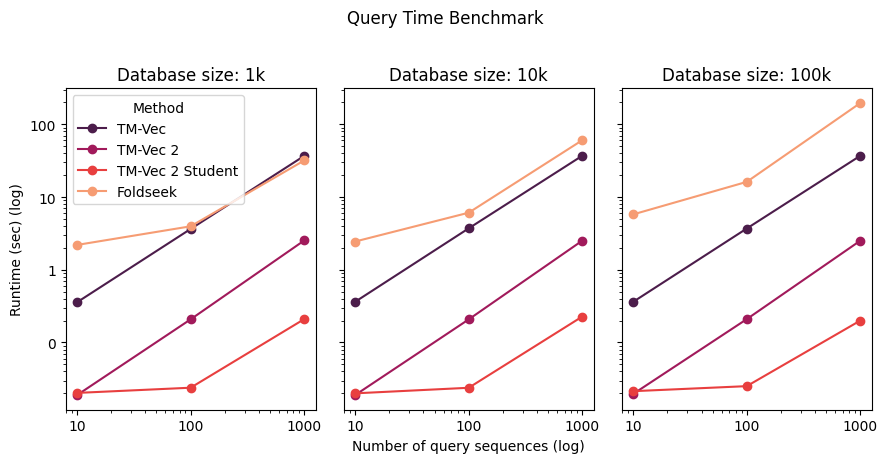

In [42]:
n_query_methods = len(query_methods)
query_colors = sns.color_palette("rocket", n_colors=n_query_methods)

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(9, 4.5))
for i, size in enumerate(db_sizes):
    ax = axes[i]
    for method, name, color in zip(query_methods, query_names, query_colors):
        df_ = df_melt.query(f'db_size == {size} & method == "{method}"')
        ax.plot('query_size', 'runtime', data=df_, marker='o', label=name, color=color)
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(ScalarFormatter())
    if i == 0:
        ax.set_ylabel('Runtime (sec) (log)')
        ax.set_yscale('log')
        ax.yaxis.set_major_formatter(ScalarFormatter())
        ax.legend(title='Method', bbox_to_anchor=(0, 1), loc='upper left')
    if i == 1:
        ax.set_xlabel('Number of query sequences (log)')
    ax.set_title(f'Database size: {int(size / 1000)}k')
fig.suptitle('Query Time Benchmark', y=1.02)
fig.tight_layout()
fig.savefig('query.svg', bbox_inches='tight')